# Analysis on Meds<>Labtest pairs of Top 10 Meds (atleast 50 subjects)
Run all cells or view results below.

## Import Libraries

In [ ]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import mannwhitneyu
from scipy import stats
from tqdm import tqdm
import os

## Load Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PARENT='/content/drive/MyDrive/TAU'
DATA = PARENT+'/Datasets/mimiciii/1.4'

In [ ]:
for i in os.walk(os.path.join(DATA)):
    print(i)

('/content/drive/MyDrive/TAU/Datasets/mimiciii/1.4', [], ['CALLOUT.csv.gz', 'ADMISSIONS.csv.gz', 'CAREGIVERS.csv.gz', 'D_ITEMS.csv.gz', 'D_ICD_PROCEDURES.csv.gz', 'D_ICD_DIAGNOSES.csv.gz', 'ICUSTAYS.csv.gz', 'CHARTEVENTS.csv.gz', 'DRGCODES.csv.gz', 'CPTEVENTS.csv.gz', 'DIAGNOSES_ICD.csv.gz', 'D_CPT.csv.gz', 'D_LABITEMS.csv.gz', 'DATETIMEEVENTS.csv.gz', 'INPUTEVENTS_CV.csv.gz', 'INPUTEVENTS_MV.csv.gz', 'LABEVENTS.csv.gz', 'MICROBIOLOGYEVENTS.csv.gz', 'OUTPUTEVENTS.csv.gz', 'PATIENTS.csv.gz', 'README.md', 'PROCEDURES_ICD.csv.gz', 'PRESCRIPTIONS.csv.gz', 'TRANSFERS.csv.gz', 'PROCEDUREEVENTS_MV.csv.gz', 'SERVICES.csv.gz', 'LICENSE.txt', 'NOTEEVENTS.csv.gz', 'SHA256SUMS.txt', 'index.html'])


## Analysis - Top 10 Meds

### Load Results

In [ ]:
results = pd.read_csv(os.path.join(PARENT, 'Med-Labtest_Pairs_Top10Meds_50Subjects.csv'))

In [ ]:
results = results.drop(columns=['Unnamed: 0'])

In [ ]:
results

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,NaCl 0.9%,"Calcium, Total",1043,7.811601,0.852798,16.419751,6.010735,7.826366,0.741066,9.325775,6.819014,0.038304,0.673022
1,NaCl 0.9%,Chloride,812,107.272167,9.622521,15.968555,6.222861,107.825123,8.993981,9.147065,6.694655,0.497539,0.231757
2,NaCl 0.9%,Creatinine,844,2.666588,2.264125,16.760190,5.727178,2.608412,2.196355,8.091469,6.464699,0.071883,0.592175
3,NaCl 0.9%,Phosphate,973,3.547174,1.987395,15.845529,6.151007,3.430319,1.957726,9.633436,6.870303,0.029920,0.191499
4,NaCl 0.9%,Potassium,366,4.400820,1.531093,14.377505,6.954470,4.112842,1.359583,9.152732,6.651877,0.022873,0.007295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Phenylephrine,Lactate Dehydrogenase (LD),70,1071.542857,1967.656855,14.703810,6.566310,1474.428571,3120.660993,11.007381,6.889183,0.482548,0.362474
415,Phenylephrine,Calculated Total CO2,159,22.270440,7.573844,17.766667,6.526962,22.647799,8.153696,6.555556,6.764487,0.381172,0.669252
416,Phenylephrine,"Potassium, Whole Blood",76,4.476316,1.363708,16.134211,6.735989,3.651316,1.072877,9.906140,6.899038,0.000063,0.000057
417,Phenylephrine,Troponin T,72,0.495417,0.850970,17.481944,5.357136,0.514028,0.845358,6.709259,6.189675,0.249992,0.895443


### Significance Test - 0.05 P value threshold

In [ ]:
results[results['Ttest-pvalue']>0.05]

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,NaCl 0.9%,"Calcium, Total",1043,7.811601,0.852798,16.419751,6.010735,7.826366,0.741066,9.325775,6.819014,0.038304,0.673022
1,NaCl 0.9%,Chloride,812,107.272167,9.622521,15.968555,6.222861,107.825123,8.993981,9.147065,6.694655,0.497539,0.231757
2,NaCl 0.9%,Creatinine,844,2.666588,2.264125,16.760190,5.727178,2.608412,2.196355,8.091469,6.464699,0.071883,0.592175
3,NaCl 0.9%,Phosphate,973,3.547174,1.987395,15.845529,6.151007,3.430319,1.957726,9.633436,6.870303,0.029920,0.191499
5,NaCl 0.9%,Asparate Aminotransferase (AST),412,322.092233,945.377838,15.133617,6.379940,319.252427,880.263201,10.018083,7.053864,0.136435,0.964418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Phenylephrine,pH,311,7.340482,0.122201,19.114255,5.423369,7.346752,0.109962,5.764845,6.008689,0.263766,0.501435
414,Phenylephrine,Lactate Dehydrogenase (LD),70,1071.542857,1967.656855,14.703810,6.566310,1474.428571,3120.660993,11.007381,6.889183,0.482548,0.362474
415,Phenylephrine,Calculated Total CO2,159,22.270440,7.573844,17.766667,6.526962,22.647799,8.153696,6.555556,6.764487,0.381172,0.669252
417,Phenylephrine,Troponin T,72,0.495417,0.850970,17.481944,5.357136,0.514028,0.845358,6.709259,6.189675,0.249992,0.895443


In [ ]:
significant = results[results['Ttest-pvalue']<=0.05]

In [ ]:
significant

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
4,NaCl 0.9%,Potassium,366,4.400820,1.531093,14.377505,6.954470,4.112842,1.359583,9.152732,6.651877,2.287311e-02,7.295012e-03
6,NaCl 0.9%,Bicarbonate,722,21.753463,7.539091,16.285780,6.158880,22.778809,7.895061,8.435919,6.636337,2.265146e-03,1.171588e-02
7,NaCl 0.9%,Glucose,1956,150.726483,68.153605,16.972648,5.872242,143.696319,65.379450,8.466948,6.736475,5.112400e-08,1.003005e-03
9,NaCl 0.9%,Hematocrit,2087,30.188788,4.722489,17.640720,5.579917,29.438476,4.399075,8.146231,6.638661,1.083658e-07,1.147101e-07
10,NaCl 0.9%,Hemoglobin,2061,10.305580,1.710020,16.812219,5.776789,10.069384,1.564701,9.365462,6.841512,1.593334e-06,3.838590e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Phenylephrine,Potassium,84,4.633333,1.445669,16.304167,6.262755,4.189286,1.264341,8.689087,6.214812,2.176822e-02,3.557300e-02
390,Phenylephrine,Hemoglobin,510,10.193529,1.510974,18.442549,5.445069,9.979412,1.512511,7.631569,6.213273,2.772901e-02,2.392308e-02
401,Phenylephrine,Albumin,116,2.500000,0.469042,14.867098,6.151481,2.368103,0.478512,11.095833,7.155057,1.396749e-02,3.507074e-02
413,Phenylephrine,pO2,410,182.665854,107.533826,20.473333,4.587302,146.268293,79.867593,3.970407,5.082853,7.257058e-06,5.023434e-08


#### Plots and Analysis

In [ ]:
vals = significant.groupby('Medication Name').sum()['Number of patients']

In [ ]:
vals = pd.DataFrame(vals).sort_values(by='Number of patients')
vals = vals.reset_index()
vals

,Medication Name,Number of patients
0,Norepinephrine,893
1,Phenylephrine,1196
2,Gastric Meds,2023
3,Fentanyl,4119
4,PO Intake,4969
5,Propofol,5723
6,Solution,6824
7,Insulin - Regular,8016
8,Dextrose 5%,11431
9,NaCl 0.9%,14256


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = list(vals['Medication Name'])
y = list(vals['Number of patients'])

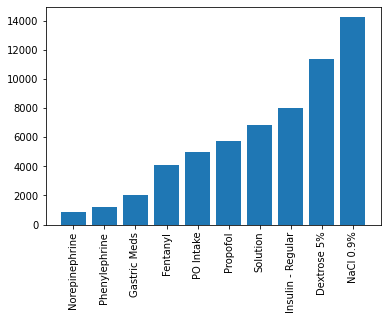

In [ ]:
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
res_analysis = results

### Bonferroni

In [ ]:
from statsmodels.stats.multitest import multipletests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pvals = res_analysis['Ttest-pvalue']

In [ ]:
bonferroni_analysis = multipletests(pvals, alpha=0.05, method='bonferroni')

In [ ]:
bonferroni_analysis

In [ ]:
reject, pvals_corrected, _, alphacBonf = bonferroni_analysis

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[reject]

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
9,NaCl 0.9%,Hematocrit,2087,30.188788,4.722489,17.640720,5.579917,29.438476,4.399075,8.146231,6.638661,1.083658e-07,1.147101e-07
10,NaCl 0.9%,Hemoglobin,2061,10.305580,1.710020,16.812219,5.776789,10.069384,1.564701,9.365462,6.841512,1.593334e-06,3.838590e-06
14,NaCl 0.9%,Red Blood Cells,2110,3.404251,0.576277,16.520355,5.853480,3.322858,0.529566,9.519510,6.852224,3.140346e-07,1.838819e-06
37,NaCl 0.9%,pO2,856,149.918224,92.074698,18.540129,5.578515,127.899533,73.318765,6.039622,5.980608,2.214132e-06,5.071892e-08
41,NaCl 0.9%,"Potassium, Whole Blood",96,4.555208,1.429897,14.540278,7.327160,3.697917,1.141557,8.685243,6.819249,3.338726e-04,8.015239e-06
57,Dextrose 5%,Hematocrit,1827,29.851834,4.611600,16.972505,5.738190,29.193049,4.300884,8.804105,6.933459,7.183990e-06,8.231651e-06
86,Dextrose 5%,pO2,749,146.935915,92.694246,18.031998,5.893312,122.643525,70.174971,6.403182,6.308524,3.456140e-07,1.296136e-08
131,Solution,pO2,828,172.684783,104.793496,19.098349,5.462363,139.544686,74.014275,5.273410,5.653935,6.908372e-09,1.696164e-13
135,Solution,"Potassium, Whole Blood",105,4.356190,1.416043,16.025714,6.327110,3.539048,0.983273,9.552063,7.181368,1.158369e-04,2.340874e-06
173,Propofol,pO2,724,186.505525,106.779338,19.911188,4.998696,153.265193,80.796614,4.554236,5.414191,5.637025e-08,3.409579e-11


In [ ]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(PARENT, 'Bonferroni_pvalues_medlab_pairs.csv'))

### FDR - Benjamini/Hochberg (non-negative) - Using package

In [ ]:
fdr1_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
reject, pvals_corrected, _, alphacBonf = fdr1_analysis

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[reject]

,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
7,NaCl 0.9%,Glucose,1956,150.726483,68.153605,16.972648,5.872242,143.696319,65.379450,8.466948,6.736475,5.112400e-08,1.003005e-03
9,NaCl 0.9%,Hematocrit,2087,30.188788,4.722489,17.640720,5.579917,29.438476,4.399075,8.146231,6.638661,1.083658e-07,1.147101e-07
10,NaCl 0.9%,Hemoglobin,2061,10.305580,1.710020,16.812219,5.776789,10.069384,1.564701,9.365462,6.841512,1.593334e-06,3.838590e-06
11,NaCl 0.9%,Lymphocytes,655,9.847634,9.943271,13.724784,6.406327,12.220458,12.785868,10.487506,6.674397,2.271868e-05,1.850823e-04
14,NaCl 0.9%,Red Blood Cells,2110,3.404251,0.576277,16.520355,5.853480,3.322858,0.529566,9.519510,6.852224,3.140346e-07,1.838819e-06
37,NaCl 0.9%,pO2,856,149.918224,92.074698,18.540129,5.578515,127.899533,73.318765,6.039622,5.980608,2.214132e-06,5.071892e-08
41,NaCl 0.9%,"Potassium, Whole Blood",96,4.555208,1.429897,14.540278,7.327160,3.697917,1.141557,8.685243,6.819249,3.338726e-04,8.015239e-06
54,Dextrose 5%,Bicarbonate,640,21.706563,7.449632,15.748828,6.251355,23.251562,7.864313,9.456432,6.738553,1.151037e-04,3.202672e-04
57,Dextrose 5%,Hematocrit,1827,29.851834,4.611600,16.972505,5.738190,29.193049,4.300884,8.804105,6.933459,7.183990e-06,8.231651e-06
58,Dextrose 5%,Hemoglobin,1812,10.174338,1.683174,16.088429,5.926400,9.974062,1.532692,10.009124,7.009911,1.467738e-04,1.832104e-04


In [ ]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(PARENT, 'FDR_Benjamini_pvalues_medlab_pairs.csv'))

### FDR - two stage fdr correction  (non-negative) - Using package

In [ ]:
fdr2_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
reject, pvals_corrected, _, alphacBonf = fdr2_analysis

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[reject].reset_index()

,index,Medication Name,Feature Name,Number of patients,Feature Before(mean),Feature Before(std),Time Before(mean),Time Before(std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Mannwhitney-pvalue,Ttest-pvalue
0,7,NaCl 0.9%,Glucose,1956,150.726483,68.153605,16.972648,5.872242,143.696319,65.379450,8.466948,6.736475,5.112400e-08,1.003005e-03
1,9,NaCl 0.9%,Hematocrit,2087,30.188788,4.722489,17.640720,5.579917,29.438476,4.399075,8.146231,6.638661,1.083658e-07,1.147101e-07
2,10,NaCl 0.9%,Hemoglobin,2061,10.305580,1.710020,16.812219,5.776789,10.069384,1.564701,9.365462,6.841512,1.593334e-06,3.838590e-06
3,11,NaCl 0.9%,Lymphocytes,655,9.847634,9.943271,13.724784,6.406327,12.220458,12.785868,10.487506,6.674397,2.271868e-05,1.850823e-04
4,14,NaCl 0.9%,Red Blood Cells,2110,3.404251,0.576277,16.520355,5.853480,3.322858,0.529566,9.519510,6.852224,3.140346e-07,1.838819e-06
5,37,NaCl 0.9%,pO2,856,149.918224,92.074698,18.540129,5.578515,127.899533,73.318765,6.039622,5.980608,2.214132e-06,5.071892e-08
6,41,NaCl 0.9%,"Potassium, Whole Blood",96,4.555208,1.429897,14.540278,7.327160,3.697917,1.141557,8.685243,6.819249,3.338726e-04,8.015239e-06
7,54,Dextrose 5%,Bicarbonate,640,21.706563,7.449632,15.748828,6.251355,23.251562,7.864313,9.456432,6.738553,1.151037e-04,3.202672e-04
8,57,Dextrose 5%,Hematocrit,1827,29.851834,4.611600,16.972505,5.738190,29.193049,4.300884,8.804105,6.933459,7.183990e-06,8.231651e-06
9,58,Dextrose 5%,Hemoglobin,1812,10.174338,1.683174,16.088429,5.926400,9.974062,1.532692,10.009124,7.009911,1.467738e-04,1.832104e-04


In [ ]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(PARENT, 'FDR_two-stage_pvalues_medlab_pairs.csv'))